 **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

**Import Dataset**

In [ ]:
cardioData = pd.read_csv('cardio_train.csv', sep=';')

# Exploratory Data Analysis/ Visualization
**Initial Analysis**

In [ ]:
cardioData.head()

**Univariate Analysis**

In [ ]:
cardioData.info()

*The variables are all numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field.*
*Now we use the .describe() function to display some sample statistics such as mean, media, standard deviation, etc. of each variable*

In [ ]:
cardioData.describe()

*From the table above we can clearly observe that there are obvious outliers in the weight, height, ap_hi and ap_lo categories. Example, the 25th and 75th percentile of values for weight range from 65kg to 82kg while the min (10kg) and max(200kg) values are insanely far from the interquartile range. We will settle these outliers later when we proceed with Data Cleaning*

**DATA DESCRIPTION** 


*From the initial and univariate analysis, we found out that Age is measured in days, Height is in centimeters, etc. Bellow is the compilled list of Features and value type of each variable in the Dataset. Binary value types indicate only values 1 and 0, indicating YES and NO respectively*

| Feature | Variable | ValueType |
| --- | --- | --- |
| Age | age | int(days) |
| Height | height | int(cm) |
| Weight | weight | float(kg) |
| Gender | gender | categorial code, 1:Women, 2:Men |
| Systolic blood pressure | ap_hi | int |
| Diastolic blood pressure | ap_lo | int |
| Cholestrol level | cholestrol | 1:Normal, 2:Above normal, 3:Well above normal |
| Glucose | gluc | 1:Normal, 2:Above normal, 3:Well above normal |
| Smoking | smoke | binary |
| Alcohol intake | alco | binary |
| Physical activity | active | binary |
| Pressence or absence of cardiovascular disease | cardio | binary

*Lets look at the various numeric variables and examine how they spread accross a specific target class. We'll do a cursory examination of what age does the number of people with caridiovascular disease (CVD) exceed the number of people who don't have CVD*

In [ ]:
#Change the data for age from days to years and store them as new data variable
cardioData['age(years)'] = (cardioData['age']/365). round().astype('int')  
f, axes = plt.subplots(1, 1, figsize=(10, 7))
sb.countplot(x='age(years)', hue='cardio', data = cardioData, palette="Set1")


*From the countplot above, we can observe that people over the age of 55 are clearly more exposed to having CVD. As you can see starting from at 56, there are more people in the dataset who have CVD than people without CVD*

*Lets take a look the categorial variables in the dataset aswell, Gender, Cholesterol, Glucose, Smoking and Alcohol Intake* 

In [ ]:
cardioData_category = cardioData.loc[:,['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']] 
f, axes = plt.subplots (1,1, figsize = (10,10))
sb.countplot(x="variable", hue="value", data= pd.melt(cardioData_category))

**Bivariate Analysis**

*Now lets split the categorial variables by weather the people in the dataset have CVD or not based on their variables*

In [ ]:
cardioData_CatCountSplit = pd.melt(cardioData, id_vars = ['cardio'], value_vars = ['gender', 'cholesterol', 'gluc', 'smoke'
                                                                                ,'alco', 'active'])
sb.catplot(x="variable", hue="value", col="cardio",
                data=cardioData_CatCountSplit, kind="count")

*The left plot shows the individuals without CVD and Right plot shows with CVD*
*for Cholestorol Level and Glucose, 1:Normal, 2:Above normal, 3:Well above normal*
*It can be seen that there tends to be more people with CVD who have higher above normal and well above normal cholestorol levels in comparison to people without CVD, likewise can be said for glucose. However it is difficult to determine the exact count value from it just from the plot*


In [ ]:
#count the number of female and males
cardioData['gender'].value_counts()

*There appears to be more females than males in the dataset*

In [ ]:
#Number of people in the dataset who don't have and have CVD
cardioData['cardio'].value_counts()

*From the dataset, it appears that there is a relatively balanced number of individuals who don't have and have CVD*

## Feature engineering
*It is getting fustrating being unable to read the status of the variables as numeric numbers (0,1,2,3) instead of their actual defenition. Lets do some feature engineering so it make the data more readable. In addition we will use plotly to better identify and head the plots as the library provides more features and functions*

In [ ]:
# create a dictionary to map the old values to the new definition values
cholesterol_map = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
glucose_map={1: 'normal', 2: 'above average', 3: 'well above normal'}
smoking_map={0:'no',1:'yes'}
alcohol_map={0:'no',1:'yes'}
active_map={0:'no',1:'yes'}
cvd_map={0:'no',1:'yes'}
gender_map={1:'female',2:'male'}

# use the replace() method to map the values in the 'cholesterol' column
cardioData['cholesterol'] = cardioData['cholesterol'].replace(cholesterol_map)
cardioData['gluc'] = cardioData['gluc'].replace(glucose_map)
cardioData['smoke'] = cardioData['smoke'].replace(smoking_map)
cardioData['alco'] = cardioData['alco'].replace(alcohol_map)
cardioData['active'] = cardioData['active'].replace(active_map)
cardioData['cardio'] = cardioData['cardio'].replace(cvd_map)
cardioData['gender'] = cardioData['gender'].replace(gender_map)


#Changing object datataypes to factors
cardioData['cholesterol'] = cardioData['cholesterol'].astype('category')
cardioData['gluc'] = cardioData['gluc'].astype('category')
cardioData['smoke'] = cardioData['smoke'].astype('category')
cardioData['alco'] = cardioData['alco'].astype('category')
cardioData['active'] = cardioData['active'].astype('category')
cardioData['cardio'] = cardioData['cardio'].astype('category')

In [ ]:
import plotly.express as px
fig = px.histogram(cardioData, x='age(years)', color='cardio',opacity=0.5, nbins=len(cardioData['age(years)'].unique()), 
                   color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(title_text='Cardiovascular Disease by Age',
                  xaxis_title_text='Age (years)',
                  yaxis_title_text='Count')

fig.show()


In [ ]:
cardioData_categorical = cardioData.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
cardioData_categorical = pd.melt(cardioData_categorical)
fig = px.histogram(cardioData_categorical, x='variable', color='value', nbins=len(cardioData_categorical['variable'].unique()), 
                   color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_text='Variable Distributions',
                  xaxis_title_text='Variables',
                  yaxis_title_text='Count')

fig.show()

In [ ]:
cardioData_long = pd.melt(cardioData, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke',
                                                                      'alco', 'active'])
fig = px.histogram(cardioData_long, x='variable', color='value', facet_col='cardio',
                   nbins=len(cardioData_long['variable'].unique()), 
                   color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_text='Variable Distribution Among People without and with CVD',
                  xaxis_title_text='Variables',
                  yaxis_title_text='Count')

fig.show()

*Now all the data are shown in a more presentable and easier to understand format. From here we can easily identify that the number of people with CVD who has well above normal and above normal values of cholesterol and glucose tends to be higher than people without CVD. In addition with the use of plotly we can clearly identify the exact count number of individuals*

# **Data Cleaning**

*Lets first check if there are any Null or missing values in the dataset*


In [ ]:
cardioData.isnull().values.any()

*While browsing through the data, we noticed that there were several discrepencies in the systolic and diatolic blood pressures. There were negative values of blood pressure which is unrealistic. In addition to that, there are additional cases where Diastolic pressure is higher than systolic pressure and this is considered an abnormal case which we should remove from the dataset*

In [ ]:
#create dataframe with initial Diastolic and Systolic blood pressure levels
blood_pressure = cardioData[['ap_lo', 'ap_hi']]

blood_pressure = blood_pressure.melt(var_name='variable', value_name='value')

fig = px.box(blood_pressure, x='variable', y='value', color='variable', title='Initial Blood Pressure')
fig.show()

# Print the number of cases where diastolic pressure is higher than systolic pressure
num_cases = cardioData[cardioData['ap_lo'] > cardioData['ap_hi']].shape[0]
print("Diastolic pressure is higher than systolic one in {0} cases".format(num_cases))

*The same is done for the height and weight variables. These variables too contain rather unnatural abnormality values such as the minimum weight in the dataset to be 10.*

In [ ]:
height_weight = cardioData[['height','weight']]

height_weight = height_weight.melt(var_name='variable', value_name='value')

fig = px.box(height_weight, x='variable', y='value', color='variable', title='Initial Height & Weight')
fig.show()

## Create New Variable (BMI)
*With the given values of height and weight in the dataset, we created another variable BMI as we believe it may be of relevance when it comes to CVD detection later on when we create our Machine Learning Model.* 
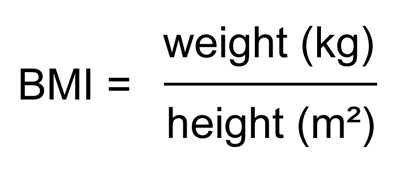

## Remove outliers
*We then did data cleaning on the 6 relevant numeric variables, Age, Weight, Height, Systolic & Diastolic blood pressure and BMI*

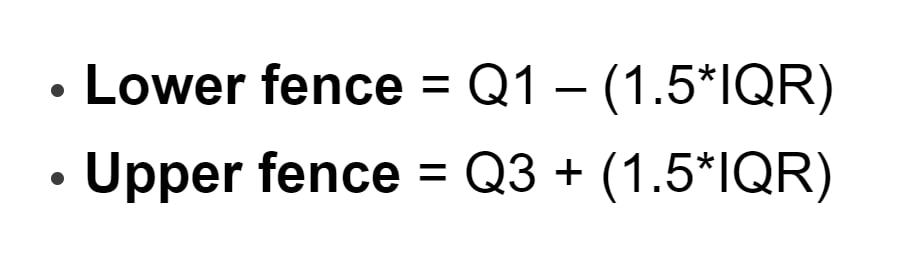
*We utilized the upper and lower fences representation in statistics to cut-off values for upper and lower outliers of the 6 numeric variables in the dataset.*

In [ ]:
def addBMI(rawData):
    rawData['BMI']=rawData['weight']/(rawData['height']/100)**2
    return rawData
def dataCleaning(rawData):
    #remove rows that contain Negative value for ap_hi and ap_lo
    rawData =rawData.drop(rawData[rawData.ap_hi<0].index)
    rawData =rawData.drop(rawData[rawData.ap_lo<50].index)
    
    #remove rows that contain extreme high values for ap_hi 
    rawData =rawData.drop(rawData[rawData.ap_hi>300].index)
    
    outliers=[]
    #loop the whole dataset
    for rawColumn in rawData:
        if(rawColumn=='age'or rawColumn=='weight'or rawColumn=='height'or rawColumn=='ap_hi'or rawColumn=='ap_lo' or rawColumn=='BMI'):
            #set a top limit and bottom limit for column that need to change
            q1=rawData[rawColumn].describe()[4]
            q3=rawData[rawColumn].describe()[6]
            iqr=q3-q1
            topLimit=q3+1.5*iqr
            bottomLimit=q1-1.5*iqr
            
            #select outliers with conditions
            outliers=rawData[(rawData[rawColumn]>topLimit) | (rawData[rawColumn]<bottomLimit)] 
            
            #drop the outliers
            rawData=rawData.drop(rawData[rawData.id.isin(outliers['id'])].index)
            
            #select outliers if ap_lo > ap_hi
            if(rawColumn=='ap_lo'):
                outliers=rawData[(rawData[rawColumn]>rawData['ap_hi'])]
                #drop the outliers
                rawData=rawData.drop(rawData[rawData.id.isin(outliers['id'])].index)
            
    
    
    return rawData

cardioData=addBMI(cardioData)
cardioData=dataCleaning(cardioData)        
print(cardioData)

In [ ]:
#Create new dataframe with Diastolic and Systolic blood pressure levels post data cleaning
blood_pressureNew = cardioData[['ap_lo', 'ap_hi']]

blood_pressureNew = blood_pressureNew.melt(var_name='variable', value_name='value')

fig = px.box(blood_pressureNew, x='variable', y='value', color='variable',
             title='Blood Pressure (Post Data Cleaning)')
fig.show()

# Print the number of cases where diastolic pressure is higher than systolic pressure
num_cases = cardioData[cardioData['ap_lo'] > cardioData['ap_hi']].shape[0]
print("Diastolic pressure is higher than systolic one in {0} cases".format(num_cases))

In [ ]:
height_weightnew = cardioData[['height','weight']]

height_weightnew = height_weightnew.melt(var_name='variable', value_name='value')

fig = px.box(height_weightnew, x='variable', y='value', color='variable', title='Height & Weight (Post Data Cleaning)')
fig.show()

In [ ]:
bmiData = cardioData[['BMI']]

bmiData = bmiData.melt(var_name='variable', value_name='value')

fig = px.box(bmiData, x='variable', y='value', color='variable', title='BMI (Post Data Cleaning)')
fig.show()

## Create new Categorial Variable (Blood Pressure Category)
*We categorized the blood pressure stages based according to the systolic and diastolic pressure values*
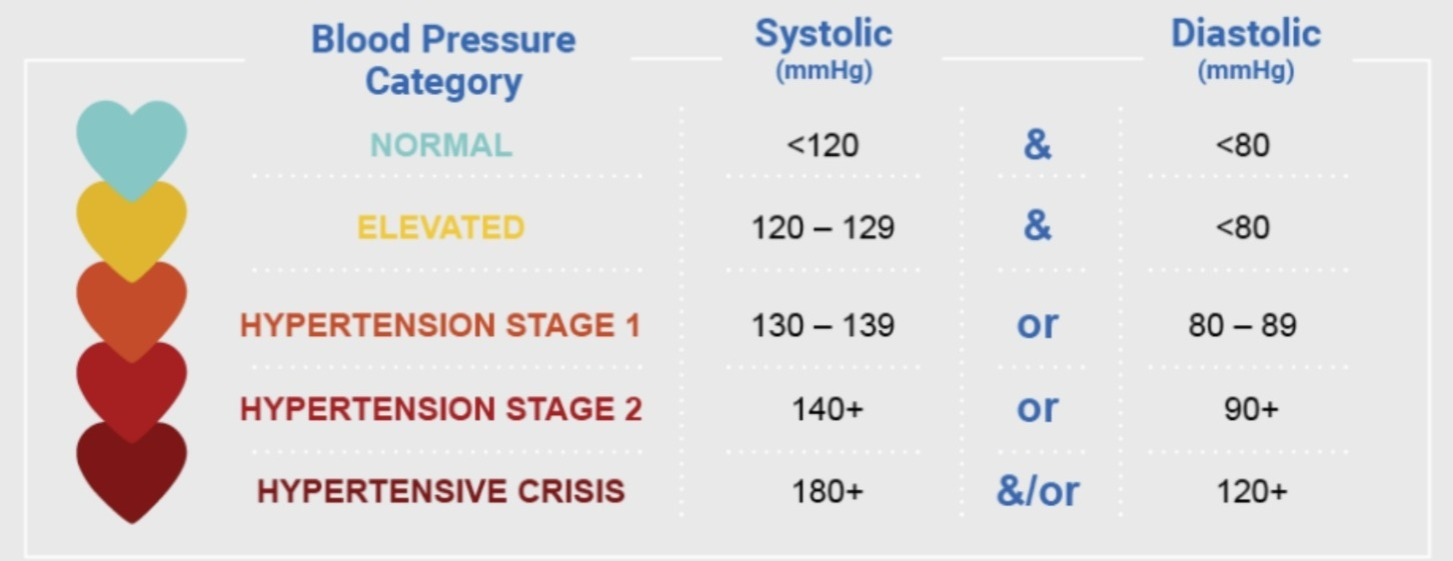
*We create a function that inserts a column BP_cat (Blood Pressure Category). This function scans 2 columns, ap_hi and ap_lo. Based on the values of these columns, it categorizes the patients blood pressure accordingly*

In [ ]:
def BPcat(x,y):
    if (x<120) and (y<80):
        return 'normal'
    elif (x<130) and (y<80):
        return 'elevated'
    elif (x<140) or (y<90):
        return 'hypertension S1'
    elif (x>=140) or (y>=90):
        return 'hypertension S2'
    elif (x>180) or (y>=120):
        return 'PASSAWAY'
    else:
        return None

cardioData.insert(7, "bp_cat", cardioData.apply(lambda row: BPcat(row['ap_hi'],row['ap_lo']), axis=1))
cardioData['bp_cat'].value_counts()

## Create New Variable (MAP)
*We included **mean arterial pressure** (MAP) aswell which is used to determine overall blood pressure. The formula is as follows*
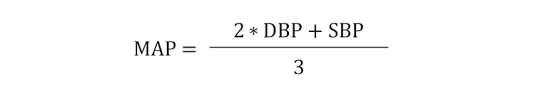

In [ ]:
cardioData['MAP'] = ((2*cardioData['ap_lo'])+cardioData['ap_hi'])/3
#Reorder Columns
cardioData = cardioData[['age','age(years)','height','weight','BMI','ap_hi','ap_lo','MAP','gender',
                        'bp_cat', 'cholesterol','gluc','smoke','alco','active','cardio']]
cardioData.head()

**Finally, we are finished with cleaning and sorting of the dataset according to our needs**

**Visualization of Variables**


In [ ]:
cardio_counts = cardioData['cardio'].value_counts()
fig = px.pie(names=cardio_counts.index, values=cardio_counts.values, 
             labels=['No CVD', 'CVD'], 
             title='CVD X NoCVD', 
             hole=0.4, 
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.show()

*There appears to be a balanced number of individuals in the dataset with and without CVD*

In [ ]:
fig = px.box(cardioData, x="cardio", y="age(years)", 
             title='.',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.show()

*It would appear that majority of the people in the data set who have CVD tend to be past the age of 50. This plot also indicates that there would be likely a higher chance of someone having CVD based on their age*

# **Problem 1: Lets determine which numeric variable is more important in determining CVD (Male)**
*First We split the Dataset into male sets*

In [ ]:
maleData = cardioData.query("gender == 'male'")

In [ ]:
maleData.head()

In [ ]:
#Here we extract the relevant numeric variables from the dataset 
maleDataNum =  maleData[['BMI','MAP','age(years)']]
maleDataNum.head()

## Correlation between Variables

In [ ]:
#use heatmap to visuallise which variable has the highest corr
cardioCData=cardioData.copy()
# create a dictionary to map the old values to the new definition values
cholesterol_map = { 'normal':1,  'above normal':2,  'well above normal':3}
glucose_map={ 'normal':1,  'above average':2,  'well above normal':3}
smoking_map={'no':0,'yes':1}
alcohol_map={'no':0,'yes':1}
active_map={'no':0,'yes':1}
cvd_map={'no':0,'yes':1}
gender_map={'female':1,'male':2}

# use the replace() method to map the values in the 'cholesterol' column
cardioCData['cholesterol'] = cardioCData['cholesterol'].replace(cholesterol_map)
cardioCData['gluc'] = cardioCData['gluc'].replace(glucose_map)
cardioCData['smoke'] = cardioCData['smoke'].replace(smoking_map)
cardioCData['alco'] = cardioCData['alco'].replace(alcohol_map)
cardioCData['active'] = cardioCData['active'].replace(active_map)
cardioCData['cardio'] = cardioCData['cardio'].replace(cvd_map)
cardioCData['gender'] = cardioCData['gender'].replace(gender_map)


#Changing object datataypes to factors
cardioCData['cholesterol'] = cardioCData['cholesterol'].astype('int64')
cardioCData['gluc'] = cardioCData['gluc'].astype('int64')
cardioCData['smoke'] = cardioCData['smoke'].astype('int64')
cardioCData['alco'] = cardioCData['alco'].astype('int64')
cardioCData['active'] = cardioCData['active'].astype('int64')
cardioCData['cardio'] = cardioCData['cardio'].astype('int64')
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(cardioCData.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r",linewidths=0.5)
plt.show()

*Based of the correlation matrix, we can identify that MAP has the highest correlation to cardio*

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(maleData['cardio'])
X = pd.DataFrame(maleData[['MAP','age(years)','BMI']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 30))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

**Determine Which Numeric Variable is most important in determining CVD in males**

In [ ]:
importances = dectree.feature_importances_

# sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# print the feature importances in descending order
for i in sorted_indices:
    print(X.columns[i], importances[i])

## K-Means Clustering
*We use K-Means Clusstering here to confirm our previously determined assumptions that MAP is the most important numeric variable in determining CVD in males*

In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
cardioYData=maleData[(maleData.gluc=='normal')&(maleData.cholesterol =='normal')]

fig = px.scatter_3d(cardioYData, x = 'age(years)', y='MAP', z='BMI',
              color='cardio', opacity = 1, size='age(years)', size_max=30)
fig.show()

*Since our Class only have male students, let us show you the distribution for males with normal glucose and cholesterol levels. We can see the positive CVD cases tend to be on the right side which is higher in MAP.* 
**From here we can also confirm the MAP is the most important variable in determining CVD in males**

# Problem 2: CVD Risk Probability
## Gaussian Naive Bayes Model
*GNB is based of this formula*
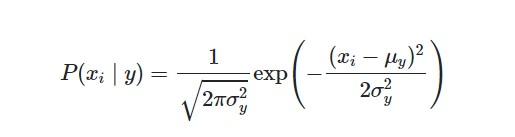
*Why use Gaussian Naive Bayes Model? Our dataset predictor values are not dependent on one another. It is relatively easy to build and can work for any size of dataset. The Model produces resonaly high accuracy too*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
modelD = {}
# Extract response and predictor variables
y = cardioData['cardio']
X = cardioData[['age(years)', 'BMI', 'MAP']]

# Convert 'yes' and 'no' to 1 and 0
y = y.replace({'no': 0, 'yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Gaussian Naive Bayes model on the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Use the trained model to predict the CVD risk category for the testing set
predictions = gnb.predict(X_test)

# Convert 1 and 0 back to 'yes' and 'no'
y_test = y_test.replace({0: 'no', 1: 'yes'})
predictions = ['yes' if i == 1 else 'no' for i in predictions]

# Calculate the accuracy, confusion matrix, and precision score of the model
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='yes')

modelD ['GNB_model']=accuracy

print("Accuracy:\t\t", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision Score:\t", precision)


## Random Forest Classifier
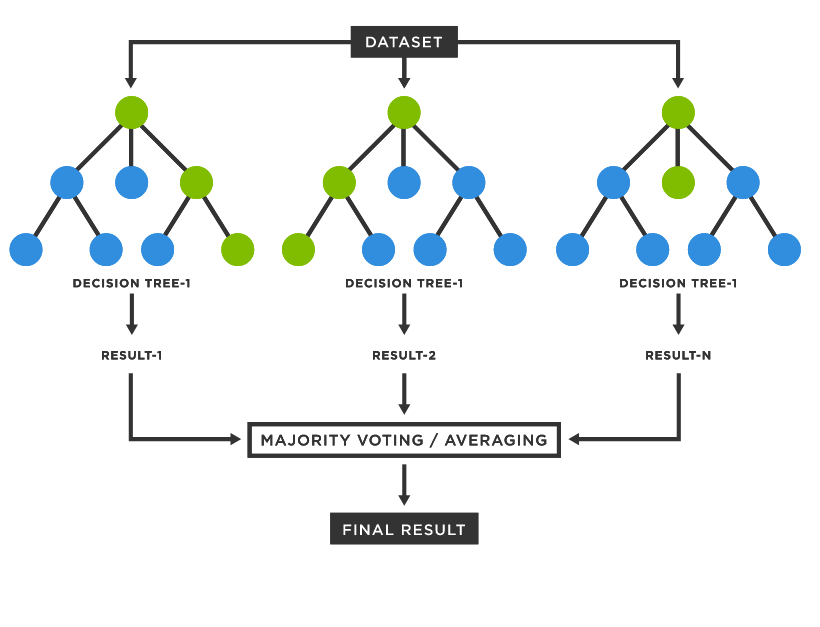
*Can be used for both regression and classification problems*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Extract response and predictor variables
y = cardioData['cardio']
X = cardioData[['age(years)', 'BMI', 'MAP']]

# Convert 'yes' and 'no' to 1 and 0
y = y.replace({'no': 0, 'yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
modelD['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

## K-Neighbors Classifier(KNN)
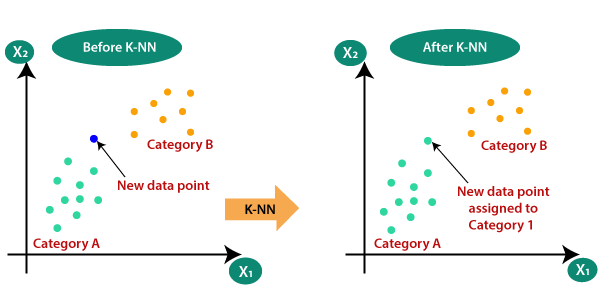
*The k-Nearest Neighbors (k-NN) algorithm is a type of supervised learning algorithm that can be used for both classification and regression problems. In classification, the k-NN algorithm works by finding the k number of training examples (i.e., the "nearest neighbors") that are closest to the input point in the feature space, based on some distance metric (such as Euclidean distance or Manhattan distance). It then assigns the class label of the input point to the most common class label among its k nearest neighbors.*

In [ ]:
# Kneighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
modelD['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

## Support Vector Classifier
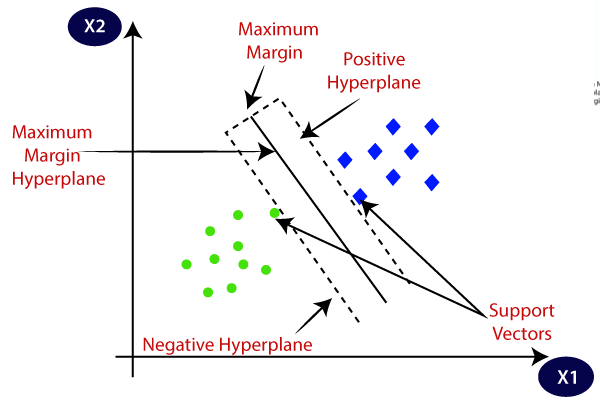
*Support Vector Classifier (SVC) is a machine learning algorithm used for classification tasks. It works by finding a hyperplane that best separates the different classes in the feature space. The hyperplane is chosen such that it maximizes the margin, which is the distance between the hyperplane and the closest data points from each class.*

In [ ]:
from  sklearn.svm import SVC
#Support Vector Classifier
classifier = SVC(random_state=42)
predictor_svc = classifier.fit(X_train, y_train)
y_pred = predictor_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
modelD['SVC'] = accuracy_svc
print(accuracy_svc)
%timeit

## XGBoost Classifier
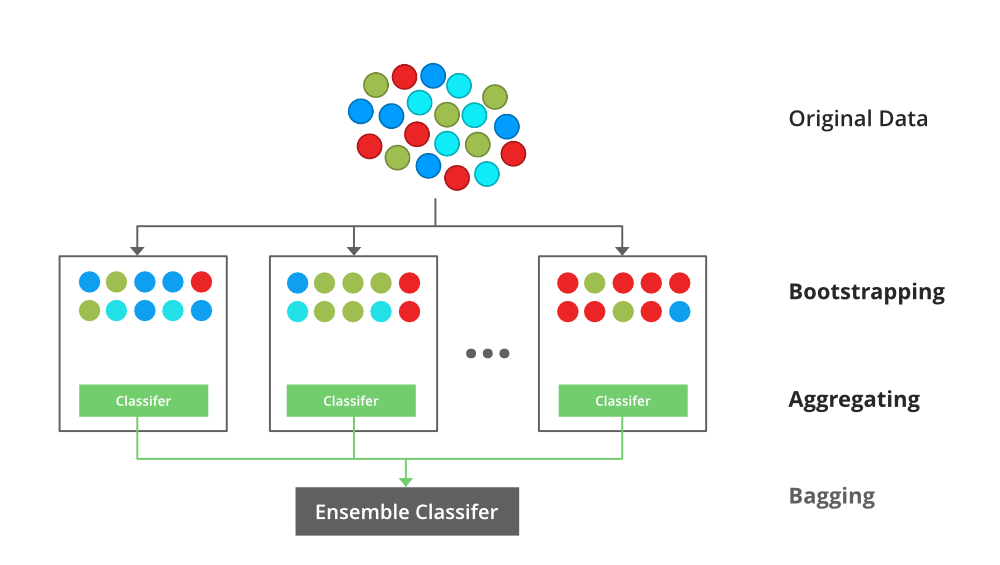
*It is an implementation of gradient-boosting decision trees. It takes each predictor variable sequentially and modelling it based on its predecessor's error. This gives more weight to predictors that perform better thus reaching an ideal model with original data*

In [ ]:
from xgboost import XGBClassifier
#XGB Classifier
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
# Extract response and predictor variables
y = cardioData['cardio']
X = cardioData[['age(years)', 'BMI', 'MAP']]

# Convert 'yes' and 'no' to 1 and 0
y = y.replace({'no': 0, 'yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
XGB_Classifier = XGBClassifier(**params)
XGB_Classifier.fit(X_train, y_train)
acc_XGB_Classifier = (XGB_Classifier.score(X_train, y_train))
acc_test_XGB_Classifier = (XGB_Classifier.score(X_test, y_test))
modelD['XGB'] =  acc_test_XGB_Classifier
print(acc_test_XGB_Classifier)

In [ ]:
#Show Accuracy Levels of Each Model
modelD

**Based on the accuracy levels and computational time of the models, we strongly reccomend either using either GNB Model or XGB Classifer Model as they are able to produce relatively good accuracy levels in a fast compitation time. Support Vector is able to produce a marginally higher accuracy level but the computational time takes too long thus we ruled it as not as efficient in determining CVD risk probability**

| Model | Accuracy Value |
| --- | --- |
| GNB_Model | 0.7033002869814766 |
| Random_Forest_Classifier | 0.637946777980694 |
| K-Neighbors_Classifier | 0.6634489955648317 |
| SVC_Model | 0.7093660318288547 |
| XGBoost_Classifier | 0.7047351943647273 |

|  | age(years) | BMI | MAP | cardio | pred | 
| --- | --- | --- | --- | --- | --- |
| 0 | 50 | 21.967120 | 90.000000 | no | no | 
| 1 | 55 | 34.927679 | 106.666667 | yes | yes |
| 2 | 52 | 23.507805 | 90.000000 | yes | yes |
| 3 | 48 | 28.710479 | 116.666667 | yes | yes |
| 5 | 60 | 29.384679 | 93.333333 | no | yes |